# Heart Deceases Prediction

This project is about heart disease and the AGE and SEX of patients

https://www.kaggle.com/code/aromadsouza/heart-disease/notebook

Dana Mazen - Asma Emad 12S1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart deceases . csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


ChestPainType :
- ATA : Cardiac chest pain is caused by an imbalance between the blood supply to the heart and oxygen needs of the heart muscle

- NAP : An injury such as muscle strain or a broken rib can cause chest pain.

- ASY : Possible causes include an injury, acid reflux, a heart or lung problem, and an infection, such as pneumonia

RestingBP :Resting blood pressure

Cholesterol : a waxy substance found in your blood 

FastingBS :Fasting Blood Sugar

RestingECG:Resting electrocardiogram (مخطط القلب الكهربائي)

MaxHR:(Maximum heart rate) greatest number of beats per minute

ExerciseAngina: It usually happens during activity (exertion) and goes away with rest or angina medication. (الذبحة الصدرية)

Oldpeak:exercise relative to rest(oldpeak), the slope of the peak

ST_Slope: The ST segment shift relative to exercise-induced increments in heart rate	

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

* There is 0 missing values

In [7]:
#we select numeric columns in the dataframe
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [8]:
#print the numeric columns
numeric

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [9]:


df['HeartDisease'].loc[df['HeartDisease']==0]='Without HeartDisease'
df['HeartDisease'].loc[df['HeartDisease']==1]='With HeartDisease'

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,Without HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,With HeartDisease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,Without HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,With HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,Without HeartDisease
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,Without HeartDisease
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,Without HeartDisease
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,Without HeartDisease
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,With HeartDisease
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,Without HeartDisease


# Graphs

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


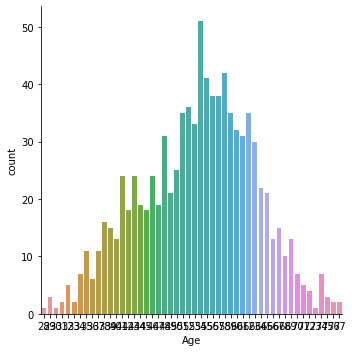

In [12]:
sns.factorplot('Age',data=df,kind='count')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


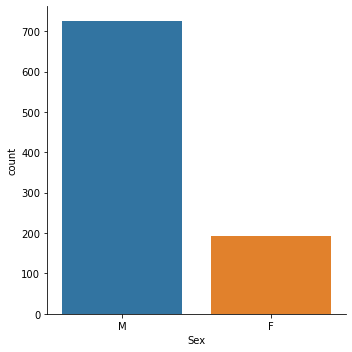

In [13]:
sns.factorplot('Sex',data=df,kind='count')

* Males are more numerous than females

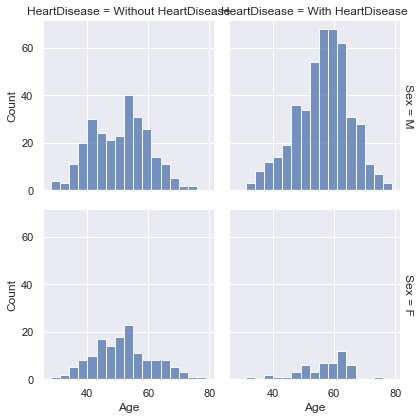

In [14]:

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="Age", col="HeartDisease", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

* Males have more heart disease, and females have less heart disease

<AxesSubplot:xlabel='FastingBS', ylabel='RestingECG'>

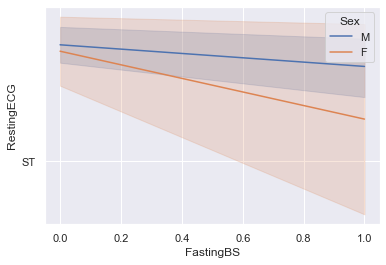

In [15]:
sns.lineplot(x="FastingBS", y="RestingECG",
             hue="Sex",
             data=df)

* RestingECG decrease when FastingBS decrease for male and female.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


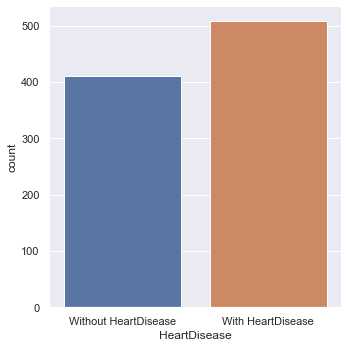

In [17]:
sns.factorplot('HeartDisease',data=df,kind='count')

* People without Heart disease are less than with Heart disease.